# Boxcar & Hanning Windows
[![Latest release](https://badgen.net/github/release/Naereen/Strapdown.js)](https://github.com/eabarnes1010/course_objective_analysis/tree/main/code)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eabarnes1010/course_objective_analysis/blob/main/code/boxcar_hanning_response_functions.ipynb)

Demonstration of Hanning and Boxcar window response functions.

The code directly below disables autoscrolling in this notebook so that you can see all of the figures at the same time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
LW = 2

### Get your data together and plot the two windows

In [2]:
T = 3
omega = np.arange(-2.*np.pi*3., 2.*np.pi*3.+.1, .1)
t = np.arange(0.01,T+0.01,0.01)

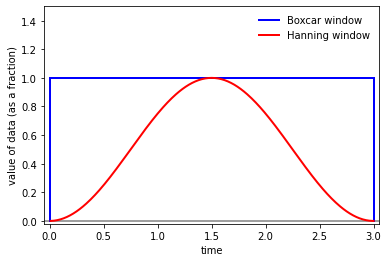

In [3]:
plt.figure()

plt.xlim(-0.05,T+0.05)
plt.ylim(-0.02,1.5)
plt.axhline(y=0,color='gray')

box_window = np.ones(np.shape(t))
plt.plot(t,box_window,'-b', linewidth = LW, label = 'Boxcar window')

plt.plot((0,0),(0,1),'-b',linewidth = LW)
plt.plot((T,T),(0,1),'-b',linewidth = LW)

hann_window = 0.5*(1-np.cos(2.*np.pi*t/T))
plt.plot(t,hann_window,'-r',linewidth = LW, label = 'Hanning window')

plt.xlabel('time')
plt.ylabel('value of data (as a fraction)')

plt.legend(frameon = False)

plt.show()

### Compute the response functions of these windows

Note that rather than actually compute them from scratch we can rely on the theory we discussed in class to plot these response functions in frequency space.

In [4]:
#%% Response functions in frequency space

BOX = np.sinc(omega*T/(2.*np.pi))
HANN = np.sinc(omega*T/(2.*np.pi)) + (1./2.)*(np.sinc(omega*T/(2.*np.pi) + 1.) + np.sinc(omega*T/(2.*np.pi) - 1.))
HANN_term1 = np.sinc(omega*T/(2.*np.pi))
HANN_terms23 = (1./2.)*(np.sinc(omega*T/(2.*np.pi) + 1.) + np.sinc(omega*T/(2.*np.pi) - 1.))

### Plot the response functions

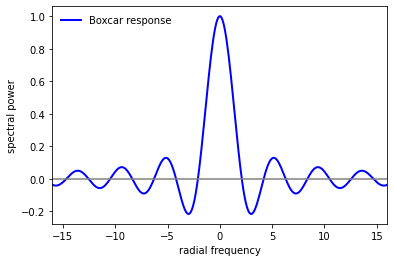

In [5]:
#%% plot Boxcar response function
plt.figure()
plt.plot(omega,BOX/np.max(BOX),'-b',linewidth = LW, label = 'Boxcar response')
plt.xlabel('radial frequency')
plt.ylabel('spectral power')
plt.axhline(y=0,color='gray')
plt.xlim(-16,16)

plt.legend(frameon = False, loc = 'upper left')

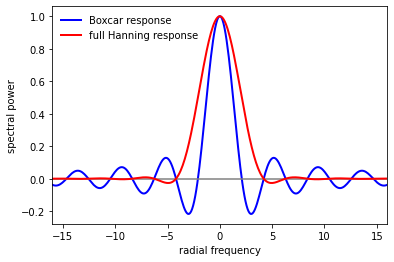

In [6]:
#%% plot Boxcar response function
plt.figure()
plt.plot(omega,BOX/np.max(BOX),'-b',linewidth = LW, label = 'Boxcar response')
plt.xlabel('radial frequency')
plt.ylabel('spectral power')
plt.axhline(y=0,color='gray')
plt.xlim(-16,16)

#%% plot Hanning response function
plt.plot(omega, HANN,'-r', linewidth = LW, label = 'full Hanning response')
plt.legend(frameon = False, loc = 'upper left')
plt.show()

The Hanning window has a similar response function to the boxcar, except those nasty side-lobes are mostly removed. However, you never get something for nothing and so the trade-off is that the response function around the central frequency of interest (freq = 0) is wider, i.e. so more smoothing. However, this may be a small price to pay. 

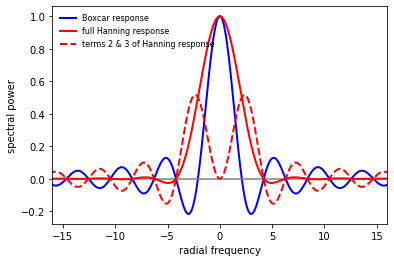

In [7]:
#%% plot Boxcar response function
plt.figure()
plt.plot(omega,BOX/np.max(BOX),'-b',linewidth = LW, label = 'Boxcar response')
plt.xlabel('radial frequency')
plt.ylabel('spectral power')
plt.axhline(y=0,color='gray')
plt.xlim(-16,16)

#%% plot Hanning response function
plt.plot(omega, HANN,'-r', linewidth = LW, label = 'full Hanning response')
plt.legend(frameon = False, loc = 'upper left')

#%% plot terms 2 and 3 of Hanning response
plt.plot(omega, HANN_terms23,'--r', linewidth = LW, label = 'terms 2 & 3 of Hanning response')
plt.legend(frameon = False, loc = 'upper left', fontsize = 8)

plt.show()

As you can see from terms 2 and 3 of the Hanning response, their main job is to cancel out the side lobes that are present in the boxcar (and term 1 of the Hanning response).